In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Import the dataset and explore basic info (nulls, data types).

In [3]:
# importing dataset and showing first rows
df = pd.read_csv("Datasets/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Column in dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Shape of dataset
df.shape

(891, 12)

In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Description of dataset
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Data types of each column in dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Total number of null values in data
df.isna().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# 2. Handle missing values using mean/median/imputation.

In [11]:
# Prcentage of missing values
((df.isna().sum() / len(df))*100).sort_values(ascending = False)
# 77.10% of data is missing in Cabin column, 19.86% in Age column, and 0.22% in Embarked column

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [12]:
# Handling Cabin column
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [13]:
# Number of unique values in Cabin column
df['Cabin'].nunique()
# 147 unique values in Cabin column

147

In [14]:
# Droping the Cabin column as it contain most of the value as NaN
df.drop(['Cabin'], axis = 1, inplace = True)

In [15]:
# Remaining columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [16]:
# Handling Age column
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
# Imputing missing value of Age column with its mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(f"Nuber of null values in Age column = {df['Age'].isna().sum()}")

Nuber of null values in Age column = 0


In [18]:
# Handling Embarked column
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
# Number of unique values in Embarked column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
# Imputing missing value of Embarked column with its mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(f"Nuber of null values in Embarked column = {df['Embarked'].isna().sum()}")

Nuber of null values in Embarked column = 0


In [21]:
# Total number of null values in data
df.isna().sum().sort_values(ascending = False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 3. Convert categorical features into numerical using encoding.

In [23]:
# Catgeorical columns
categorical = [col for col in df.columns if df[col].dtype == "object"]
categorical

['Name', 'Sex', 'Ticket', 'Embarked']

In [24]:
# Categorical dataframe
df[categorical]

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [25]:
for col in categorical:
    print(f"Number of unique values in {col} column = {df[col].nunique()}")

Number of unique values in Name column = 891
Number of unique values in Sex column = 2
Number of unique values in Ticket column = 681
Number of unique values in Embarked column = 3


In [26]:
# Dropping Name and Ticket column as categorical as they contain large number of unique data
categorical.remove('Name')
categorical.remove('Ticket')

In [53]:
categorical

['Sex', 'Embarked']

In [63]:
# Using Label Encoding to encode the categorical values of Sex and Embarked column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])

In [65]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


# 4. Normalize/standardize the numerical features.

In [70]:
# Catgeorical columns
numerical = [col for col in df.columns if df[col].dtype != "object"]
numerical

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [72]:
# Numerical dataframe
df[numerical]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [74]:
for col in numerical:
    print(f"Number of unique values in {col} column = {df[col].nunique()}")

Number of unique values in PassengerId column = 891
Number of unique values in Survived column = 2
Number of unique values in Pclass column = 3
Number of unique values in Sex column = 2
Number of unique values in Age column = 89
Number of unique values in SibSp column = 7
Number of unique values in Parch column = 7
Number of unique values in Fare column = 248
Number of unique values in Embarked column = 3


In [77]:
# Dropping PassengerId, Survived, Pclass, Sex, SibSp, Parch, and Embarked column as numerical as they contain large number of unique and categorical data
dropping_numerical = ["PassengerId", "Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
numerical = [col for col in numerical if col not in dropping_numerical]
numerical

['Age', 'Fare']

In [85]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [95]:
# Normalizating Age column with MinMax Scaling (bring data between 0 and 1)
df['Age'] = ((df['Age'] - df['Age'].min())/(df['Age'].max() - df['Age'].min()))
df['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.367921
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [97]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [105]:
# Normalization Fare column with Z-score Normalization 
df['Fare'] = (df['Fare'] - df['Fare'].mean())/df['Fare'].std()
df['Fare']

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

# 5. Visualize outliers using boxplots and remove them.

<Axes: ylabel='Fare'>

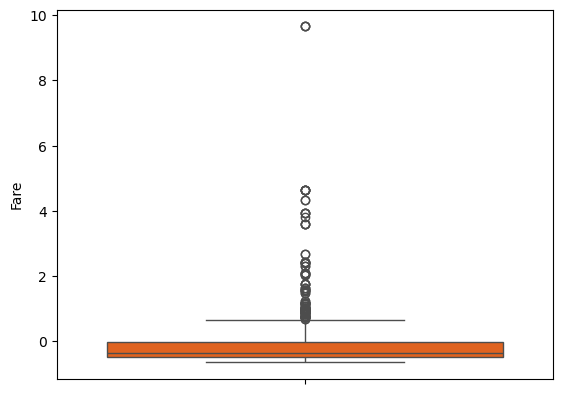

In [124]:
sns.boxplot(df['Fare'], palette = 'hot_r')

In [144]:
Q1 = df['Fare'].quantile([0.25][0]) # 1st quantile
Q3 = df['Fare'].quantile([0.75][0]) # 3rd quantile
print(f"Q1 = {Q1}\nQ3 = {Q3}")

Q1 = -0.4888736530035446
Q3 = -0.024232740677566172


In [146]:
# Inter Quantile Range (IQR)
IQR = Q3 - Q1
print(f"IQR = {IQR}")

IQR = 0.4646409123259784


In [148]:
# Upper bound and Lower bound
UB = Q3 + IQR * 1.5
LB = Q1 - IQR * 1.5

In [174]:
print(f"Upper Bound = {UB}\nLower Bound = {LB}")

Upper Bound = 0.6727286278114013
Lower Bound = -1.1858350214925122


In [192]:
# Removing outliers
ouliers_index = df[(df['Fare'] > UB) | (df['Fare'] < LB)].index
df.drop(ouliers_index, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,-0.502163,2
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,-0.488580,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.420494,2
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,-0.486064,2
5,6,0,3,"Moran, Mr. James",1,0.367921,0,0,330877,-0.477848,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.334004,0,0,211536,-0.386454,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.233476,0,0,112053,-0.044356,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.367921,1,2,W./C. 6607,-0.176164,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0.321438,0,0,111369,-0.044356,0


# Interview Questions

---

**1. What are the different types of missing data?**

There are three main types of missing data:
1. Missing Completely at Random (MCAR): The probability of data being missing is the same for all observations. The missingness is not related to any other variables in the dataset.
2. Missing at Random (MAR): The probability of data being missing is dependent on observed variables but not on the missing data itself. For example, men might be less likely to fill out a certain survey question than women, but the reason they didn't fill it out isn't related to the information they would have provided.
3. Missing Not at Random (MNAR): The probability of data being missing is dependent on the value of the missing data itself. For example, a person might not report their income on a survey because their income is very high or very low.

---

---

**2. How do you handle categorical variables?**

Categorical variables need to be converted into a numerical format for most machine learning models. Common techniques include:
1. Label Encoding: Assigns a unique integer to each category. This is suitable for ordinal data (where there's an inherent order, like "low," "medium," "high").
2. One-Hot Encoding: Creates a new binary column for each category. A '1' indicates the presence of that category, and '0' indicates its absence. This is ideal for nominal data (where there's no inherent order, like "red," "blue," "green").
3. Target Encoding: Replaces each category with the average target value for that category. This can be effective but can also lead to data leakage if not done carefully.

---

---

**3. What is the difference between normalization and standardization?**

- Normalization (Min-Max Scaling): Rescales the values of a numerical feature to a range between 0 and 1. The formula is: $$ X_{normalized} = (X - X_{min})/(X_{max} - X_{min}) $$ This is useful when you need to constrain values to a specific range and is often used with algorithms that don't assume a normal distribution, like K-Nearest Neighbors.
- Standardization (Z-Score Scaling): Rescales the values to have a mean of 0 and a standard deviation of 1. The formula is: $$ X_{standardized} = (X − μ)/σ $$ This is particularly useful for algorithms that assume a normal distribution of the data, such as Linear Regression, Logistic Regression, and Support Vector Machines.

---

---

**4. How do you detect outliers?**

Outliers can be detected using various methods:
1. Statistical Methods:
   + Z-Score: Identifies data points that are a certain number of standard deviations away from the mean (e.g., more than 3 standard deviations).
   + IQR (Interquartile Range): Defines a range between the first and third quartiles. Any data point that falls below Q1−1.5∗IQR or above Q3+1.5∗IQR is considered an outlier.
2. Visualization:
    + Box Plots: Easily visualize the quartiles and outliers.
    + Scatter Plots: Can help identify data points that lie far from the general trend.
3. Machine Learning Models:
    + Isolation Forest: A model that isolates observations by randomly selecting a feature and a split value. Outliers are typically isolated with fewer splits.
    + Local Outlier Factor (LOF): Measures the local density deviation of a data point with respect to its neighbors.

---

---

**5. Why is preprocessing important in ML?**

Preprocessing is a crucial step for several reasons:
+ Data Quality: It helps clean and prepare raw data, which is often messy, inconsistent, and incomplete. This includes handling missing values and correcting errors.
+ Algorithm Performance: Most machine learning algorithms require numerical data and can be sensitive to the scale and distribution of features. Preprocessing ensures the data is in a suitable format, which can significantly improve model performance and convergence speed.
+ Feature Engineering: It allows for the creation of new features from existing ones, which can provide more information to the model.
+ Bias Reduction: By handling outliers and normalizing data, preprocessing can help reduce the impact of extreme values, leading to a more robust model.

---

---

**6. What is one-hot encoding vs label encoding?**

1. Label Encoding: Assigns a unique integer to each category.
    + Pros: Memory-efficient and simple to implement.
    + Cons: Introduces an artificial order or rank between categories, which can mislead the model into thinking that higher numbers are "better" or more important. This is only appropriate for ordinal data.

2. One-Hot Encoding: Creates a new binary column for each category.
    + Pros: Avoids the ordinality problem of label encoding by representing each category as an independent feature.
    + Cons: Can lead to a high-dimensional and sparse dataset if there are many categories, which can increase computational cost and storage requirements.

---

---

**7. How do you handle data imbalance?**

Data imbalance occurs when the number of observations in one class is significantly lower than in other classes. This can lead to a model that performs well on the majority class but poorly on the minority class. Solutions include:
1. Resampling Techniques:
    - Oversampling: Creating synthetic or duplicate samples for the minority class to increase its size. SMOTE (Synthetic Minority Oversampling Technique) is a popular method.
    - Undersampling: Reducing the number of samples in the majority class to match the minority class size.

2. Algorithmic Approaches:
    - Using different evaluation metrics: Instead of accuracy, which can be misleading, use metrics like precision, recall, F1-score, and ROC-AUC.
    - Class weights: Some models allow you to assign a higher penalty for misclassifying the minority class by using class weights.
3. Ensemble Methods: Using techniques like Balanced Bagging or EasyEnsemble to create multiple models on balanced subsets of the data.

---

---

**8. Can preprocessing affect model accuracy?**

Yes, absolutely. Preprocessing can have a significant impact on model accuracy, often for the better.
- Positive Impact: Properly scaled data, handled missing values, and encoded categorical variables can lead to a more accurate and robust model. For example, some models like SVM and KNN are highly sensitive to the scale of features, and normalization or standardization can dramatically improve their performance.
- Negative Impact: Incorrect or inappropriate preprocessing can hurt model accuracy. For instance, using label encoding on nominal data can introduce a false sense of order, confusing the model. Also, carelessly removing a large number of outliers or missing values can lead to a loss of valuable information. The choice of preprocessing technique should always be guided by the nature of the data and the requirements of the chosen machine learning model.

---